In [1]:
import pandas as pd
import os

import re
import nltk
import string
#from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
#Getting data from file and labelling

files = os.listdir("C:\\Users\\kezia\\Impactsure\\profit_loss")
os.chdir("C:\\Users\\kezia\\Impactsure\\profit_loss")

label_list = []
text_list = []
for f in files:
    para = open(f,encoding="utf8")

    #split file to label data
    label_list.append("pl")
    text_list.append(para.read())
dict_data = {'label':label_list,"text":text_list}

In [3]:
#Getting data from file and labelling

files = os.listdir("C:\\Users\\kezia\\Impactsure\\balance_sheet")
os.chdir("C:\\Users\\kezia\\Impactsure\\balance_sheet")

for f in files:
    para = open(f,encoding="utf8")

    #split file to label data
    label_list.append("bs")
    text_list.append(para.read())
dict_data = {'label':label_list,"text":text_list}

In [4]:
#Getting data from file and labelling

files = os.listdir("C:\\Users\\kezia\\Impactsure\\cash_flow")
os.chdir("C:\\Users\\kezia\\Impactsure\\cash_flow")

for f in files:
    para = open(f,encoding="utf8")

    #split file to label data
    label_list.append("cs")
    text_list.append(para.read())
dict_data = {'label':label_list,"text":text_list}

In [5]:
#Getting data from file and labelling

files = os.listdir("C:\\Users\\kezia\\Impactsure\\reject")
os.chdir("C:\\Users\\kezia\\Impactsure\\reject")

for f in files:
    para = open(f,encoding="utf8")

    #split file to label data
    label_list.append("reject")
    text_list.append(para.read())
dict_data = {'label':label_list,"text":text_list}

In [6]:
data = pd.DataFrame(dict_data)

In [7]:
data

,label,text
0,pl,raffles education corporation limited \ncompan...
1,pl,\n \n \nconsolidated financial results for th...
2,pl,"4 \nas of march 31, 2022, the group had a tota..."
3,pl,10 \n2) interim condensed consolidated stateme...
4,pl,11 \n3) interim condensed consolidated stateme...
...,...,...
781,reject,(unaudited but reviewed)\n13\ninterim corporat...
782,reject,(unaudited but reviewed)\n14\nthe group’s fina...
783,reject,(unaudited but reviewed)\n15\n18. commitments ...
784,reject,(unaudited but reviewed)\n16\n19. financial in...


In [8]:
#print(data['text'][485])

In [9]:
Stopwords = set(stopwords.words('english'))
def clean(text):
    text = text.lower() #Converting to lowerCase
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ',text) #removing punctuation
    
    text_tokens = word_tokenize(text) #removing stopwords
    tw = [word for word in text_tokens if not word in Stopwords]
    text = (" ").join(tw)
    
    splt = text.split(' ')
    output = [x for x in splt if len(x) > 2] #removing words with length<=3
    text = (" ").join(output)
    
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text) #removing single character 
    text = re.sub(r"(\d+)", ' ',text)    #removing numbers
    text = re.sub('<.*?>+',' ',text) #removing HTML Tags
    text = re.sub('\n', ' ',text) #removal of new line characters
    text = re.sub(r'\s+', ' ',text) #removal of multiple spaces
    return text

In [10]:
data["text"] = data["text"].apply(clean)

In [42]:
data

,label,text
0,pl,raffles education corporation limited company ...
1,pl,consolidated financial results three months en...
2,pl,march group total employees increase employee ...
3,pl,interim condensed consolidated statement profi...
4,pl,interim condensed consolidated statement chang...
...,...,...
781,reject,unaudited reviewed interim corporate income ta...
782,reject,unaudited reviewed group financial information...
783,reject,unaudited reviewed commitments contingent liab...
784,reject,unaudited reviewed financial instrument fair v...


In [12]:
#print(data['text'][485])

In [13]:
data1 = data.copy()

In [14]:
#print(data1['text'][0])

In [15]:
grams = nltk.bigrams(word_tokenize(data1["text"][0]))
grams = list(grams)
print(grams)

[('raffles', 'education'), ('education', 'corporation'), ('corporation', 'limited'), ('limited', 'company'), ('company', 'registration'), ('registration', 'number'), ('number', 'n'), ('n', 'financial'), ('financial', 'statements'), ('statements', 'announcement'), ('announcement', 'three'), ('three', 'months'), ('months', 'nine'), ('nine', 'months'), ('months', 'ended'), ('ended', 'march'), ('march', 'raffles'), ('raffles', 'education'), ('education', 'corporation'), ('corporation', 'limited'), ('limited', 'page'), ('page', 'condensed'), ('condensed', 'interim'), ('interim', 'consolidated'), ('consolidated', 'statement'), ('statement', 'profit'), ('profit', 'loss'), ('loss', 'comprehensive'), ('comprehensive', 'income'), ('income', 'unaudited'), ('unaudited', 'consolidated'), ('consolidated', 'statement'), ('statement', 'comprehensive'), ('comprehensive', 'income'), ('income', 'note'), ('note', 'page'), ('page', 'group'), ('group', 'months'), ('months', 'ended'), ('ended', 'months'), ('

In [16]:
grams = nltk.bigrams(word_tokenize(data1["text"][485]))
grams = list(grams)
print(grams)

[('condensed', 'interim'), ('interim', 'consolidated'), ('consolidated', 'statement'), ('statement', 'cash'), ('cash', 'flows'), ('flows', 'group'), ('group', 'months'), ('months', 'ended'), ('ended', 'mar'), ('mar', 'mar'), ('mar', 'cash'), ('cash', 'flows'), ('flows', 'operating'), ('operating', 'activities'), ('activities', 'loss'), ('loss', 'tax'), ('tax', 'adjustments'), ('adjustments', 'depreciation'), ('depreciation', 'plant'), ('plant', 'equipment'), ('equipment', 'depreciation'), ('depreciation', 'right'), ('right', 'use'), ('use', 'assets'), ('assets', 'loss'), ('loss', 'disposal'), ('disposal', 'plant'), ('plant', 'equipment'), ('equipment', 'fair'), ('fair', 'value'), ('value', 'gain'), ('gain', 'loss'), ('loss', 'convertible'), ('convertible', 'bond'), ('bond', 'interest'), ('interest', 'income'), ('income', 'interest'), ('interest', 'expense'), ('expense', 'financial'), ('financial', 'liabilities'), ('liabilities', 'interest'), ('interest', 'expense'), ('expense', 'lease'

In [17]:
def bigram(text):
    grams = nltk.bigrams(word_tokenize(text))
    grams = list(grams)
    return grams

In [18]:
data1["text"] = data1["text"].apply(bigram)

In [41]:
data1

,label,text
0,pl,"[(raffles, education), (education, corporation..."
1,pl,"[(consolidated, financial), (financial, result..."
2,pl,"[(march, group), (group, total), (total, emplo..."
3,pl,"[(interim, condensed), (condensed, consolidate..."
4,pl,"[(interim, condensed), (condensed, consolidate..."
...,...,...
781,reject,"[(unaudited, reviewed), (reviewed, interim), (..."
782,reject,"[(unaudited, reviewed), (reviewed, group), (gr..."
783,reject,"[(unaudited, reviewed), (reviewed, commitments..."
784,reject,"[(unaudited, reviewed), (reviewed, financial),..."


In [46]:
!pip install wordcloud

     -------------------------------------- 153.1/153.1 kB 3.0 MB/s eta 0:00:00


In [49]:
## WORD CLOUDS
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def print_wordCloud(label, text):
    print(label)
    wordcloud = WordCloud(width = 400, height = 400, 
                background_color ='white', 
                min_font_size = 10).generate(text)
    plt.figure(figsize = (7, 7), facecolor = 'white', edgecolor='blue') 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()
    
def make_string(label):
    s = ""
    for row_index,row in data.iterrows():
        if(row['label'] == label):
            s+=(row['text']+' ')
    return s

bs


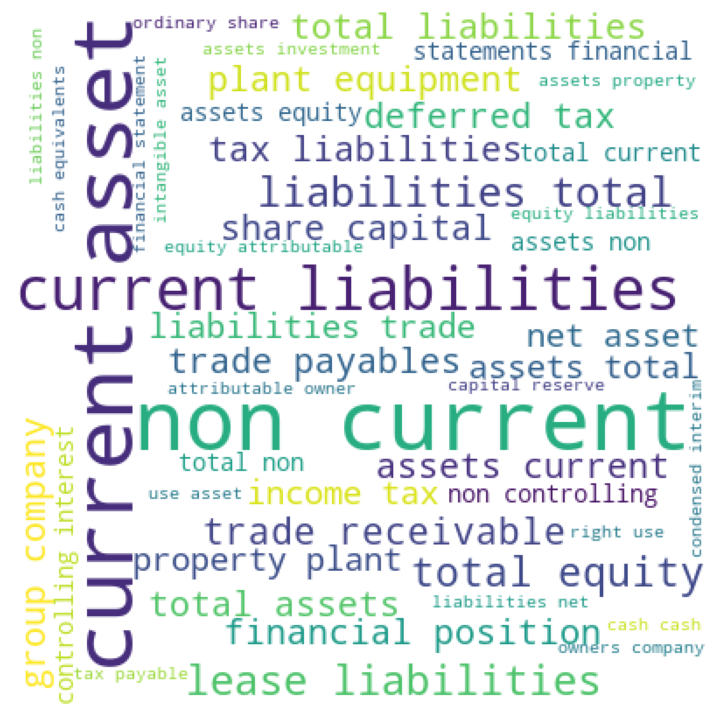

cs


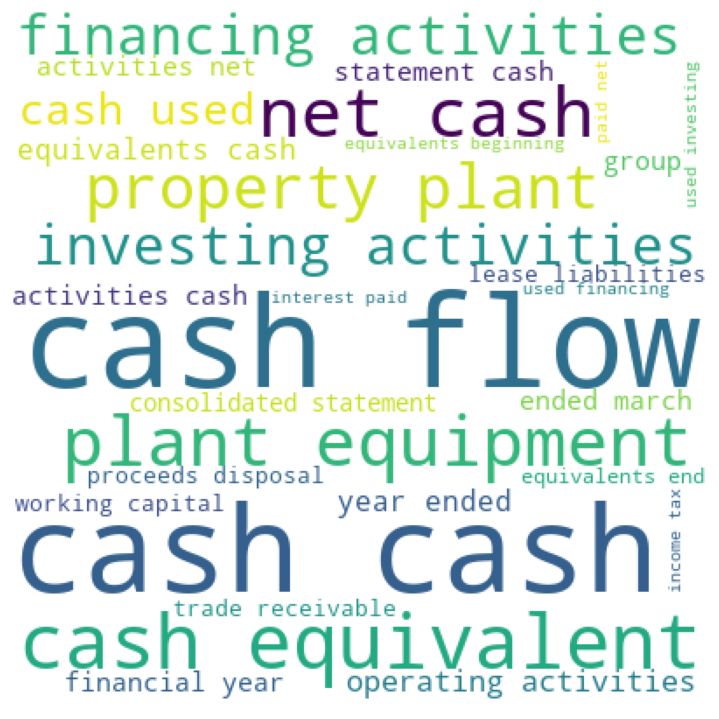

pl


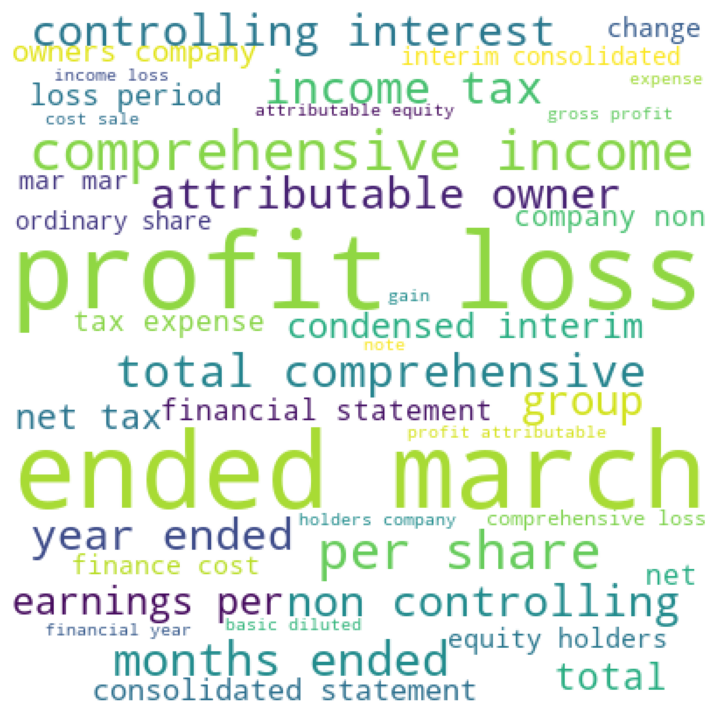

reject


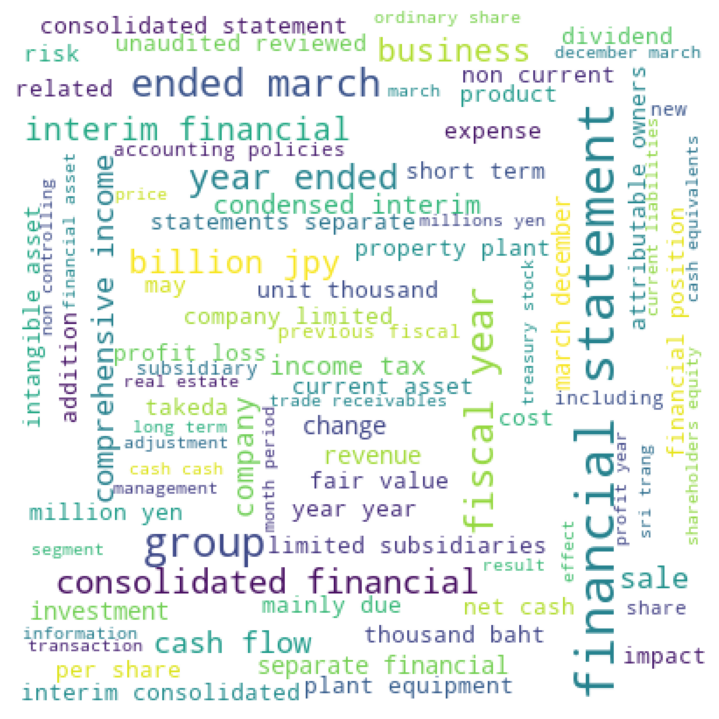

In [51]:
labels = ['bs','cs','pl','reject']
for topic in labels:
    text = make_string(topic)
    print_wordCloud(topic,text)

In [20]:
data2 = data.copy()

In [21]:
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 4))
X2 = vectorizer2.fit_transform(data2['text'])
#X = X2.toarray()
y = data2["label"]

In [22]:


from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
tf_data = tf.fit_transform(data2['text'])


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tf_data, y, test_size = 0.2,random_state=44)

In [24]:
#For Calculation of Performance of Models
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score, confusion_matrix, classification_report

#For Modelling Purpose
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.dummy import DummyClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.multiclass import OneVsRestClassifier

In [25]:
rfc = MultinomialNB()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(accuracy_score(y_pred,y_test))

0.8607594936708861


In [26]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

          bs       0.94      0.91      0.93        34
          cs       0.78      1.00      0.87        31
          pl       0.74      0.96      0.84        27
      reject       0.96      0.73      0.83        66

    accuracy                           0.86       158
   macro avg       0.85      0.90      0.87       158
weighted avg       0.88      0.86      0.86       158



In [27]:
y_pred

array(['pl', 'bs', 'reject', 'reject', 'cs', 'cs', 'cs', 'reject',
       'reject', 'pl', 'reject', 'reject', 'pl', 'reject', 'bs', 'cs',
       'reject', 'reject', 'bs', 'pl', 'bs', 'reject', 'pl', 'pl', 'cs',
       'reject', 'pl', 'reject', 'bs', 'bs', 'cs', 'cs', 'cs', 'reject',
       'bs', 'reject', 'bs', 'bs', 'bs', 'bs', 'reject', 'reject', 'bs',
       'reject', 'cs', 'cs', 'reject', 'reject', 'cs', 'reject', 'pl',
       'reject', 'cs', 'bs', 'reject', 'reject', 'pl', 'reject', 'reject',
       'pl', 'bs', 'reject', 'reject', 'cs', 'pl', 'cs', 'reject', 'pl',
       'reject', 'reject', 'bs', 'bs', 'bs', 'reject', 'pl', 'reject',
       'cs', 'reject', 'cs', 'bs', 'reject', 'cs', 'bs', 'reject',
       'reject', 'reject', 'reject', 'reject', 'reject', 'bs', 'bs', 'cs',
       'cs', 'reject', 'bs', 'reject', 'pl', 'cs', 'cs', 'pl', 'cs', 'bs',
       'reject', 'reject', 'pl', 'pl', 'pl', 'pl', 'bs', 'bs', 'reject',
       'reject', 'cs', 'reject', 'cs', 'reject', 'reject', 'bs'

In [28]:
y_test

83         pl
180        bs
486    reject
660    reject
347        cs
        ...  
243        bs
625    reject
131        pl
378        cs
650    reject
Name: label, Length: 158, dtype: object

In [29]:
#Testing Documents

files = sorted(os.listdir("C:\\Users\\kezia\\Impactsure\\test\\20220509_212056_NC2_FZI6CUD17Z38QVR9.2\\pages"))
os.chdir("C:\\Users\\kezia\\Impactsure\\test\\20220509_212056_NC2_FZI6CUD17Z38QVR9.2\\pages")
text_list = []
page_no = []
for f in files:
    para = open(f,encoding="utf8")
    page_no.append(int(f.split("_")[1].split(".")[0]))

    #split file to label data
    text_list.append(para.read())
dict_data = {"text":text_list,"page_no":page_no}
test_df = pd.DataFrame(dict_data)
test_df = test_df.set_index("page_no")
test_df= test_df.sort_index()

In [30]:
test_df

,text
page_no,
1,
2,\n \n \nsri trang agro-industry public compan...
3,\n \nindependent auditor’s report on review o...
4,sri trang agro-industry public company limited...
5,sri trang agro-industry public company limited...
6,sri trang agro-industry public company limited...
7,(unaudited but reviewed)\nsri trang agro-indus...
8,(unaudited but reviewed)\nsri trang agro-indus...
9,(unaudited but reviewed)\n(unit: baht)\nsurplu...


In [31]:
test_df['text'][7]

'(unaudited but reviewed)\nsri trang agro-industry public company limited and its subsidiaries\nstatement of comprehensive income\nfor the three-month period ended 31 march 2022\n(unit: baht)\nconsolidated financial statements\nnote 2022 2021 2022 2021\nprofit or loss:\nrevenues from sales of goods and services 27,999,879,268 31,579,549,772 16,058,704,614 11,725,271,726\ncost of sales and services (23,473,691,571) (18,027,212,837) (14,336,176,942) (10,325,458,505)\ngross profit 4,526,187,697 13,552,336,935 1,722,527,672 1,399,813,221\nother income 43,723,099 59,952,024 31,751,948 23,963,515\ndividend income 178,984 11,398 39,740 11,398\nselling and distribution expenses (1,885,675,995) (1,175,927,947) (876,301,605) (683,398,811)\nadministrative expenses (500,749,523) (459,738,316) (160,232,233) (132,897,397)\ngain on exchange rates 49,187,149 451,970,778 66,095,663 163,066,581\ngain from disposal of non-current assets held for sale - - - 957,865,596\nother gain (loss) 14 109,527,491 (1

In [32]:
test_df["text"] = test_df["text"].apply(clean)
#vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
#test = vectorizer2.transform(test_df['text'])

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
test = tf.fit(test_df)

In [36]:
test_df

,text
page_no,
1,
2,sri trang agro industry public company limited...
3,independent auditor report review interim fina...
4,sri trang agro industry public company limited...
5,sri trang agro industry public company limited...
6,sri trang agro industry public company limited...
7,unaudited reviewed sri trang agro industry pub...
8,unaudited reviewed sri trang agro industry pub...
9,unaudited reviewed unit baht surplus deficit c...


In [34]:
y_pred = rfc.predict(test)
y_pred

ValueError: Expected 2D array, got scalar array instead:
array=TfidfVectorizer().
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [40]:
test

TfidfVectorizer()